In [1]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import json
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt

### 1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [3]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

response = requests.get(endpoint)

In [4]:
response.text

'[{"month_name":"January","year":"2014","query_count":"223","query_text":"ebid"}\n,{"month_name":"January","year":"2014","query_count":"112","query_text":"property maps"}\n,{"month_name":"January","year":"2014","query_count":"97","query_text":"maps"}\n,{"month_name":"January","year":"2014","query_count":"90","query_text":"property tax"}\n,{"month_name":"January","year":"2014","query_count":"76","query_text":"jobs"}\n,{"month_name":"January","year":"2014","query_count":"75","query_text":"employment"}\n,{"month_name":"January","year":"2014","query_count":"73","query_text":"human resources"}\n,{"month_name":"January","year":"2014","query_count":"62","query_text":"police"}\n,{"month_name":"January","year":"2014","query_count":"61","query_text":"criminal court clerk"}\n,{"month_name":"January","year":"2014","query_count":"53","query_text":"media releases"}\n,{"month_name":"January","year":"2014","query_count":"50","query_text":"property taxes"}\n,{"month_name":"January","year":"2014","query

In [5]:
type(response)

requests.models.Response

In [6]:
res = response.json()
type(res)

list

In [7]:
endpoint2='https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire'
year=requests.get(endpoint2) #used that diff. query language syntax to get only 2016 and fire from the API

In [8]:
year.text #it actually worked but I don't know what to do with this because it's still a list of dictionaries 

'[{"month_name":"January","year":"2016","query_count":"19","query_text":"fire"}\n,{"month_name":"February","year":"2016","query_count":"35","query_text":"fire"}\n,{"month_name":"March","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"April","year":"2016","query_count":"26","query_text":"fire"}\n,{"month_name":"May","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"June","year":"2016","query_count":"31","query_text":"fire"}\n,{"month_name":"July","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"August","year":"2016","query_count":"47","query_text":"fire"}\n,{"month_name":"September","year":"2016","query_count":"36","query_text":"fire"}\n,{"month_name":"October","year":"2016","query_count":"38","query_text":"fire"}\n,{"month_name":"November","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"December","year":"2016","query_count":"38","query_text":"fire"}]\n'

##### Original example before using the "$query" function in SOQL: 

In [9]:
endpoint3='https://data.nashville.gov/resource/fuaa-r5cm.json?$select=month_name,query_count&$where=year=2016&query_text=fire' 
monthcount=requests.get(endpoint3) #here we send the request to the endpoint, which returns only the 2 columns of interest for year 2016 and query_text of fire

In [10]:
monthcount.text #now I've got only the month and query count by month 

'[{"month_name":"January","query_count":"19"}\n,{"month_name":"February","query_count":"35"}\n,{"month_name":"March","query_count":"32"}\n,{"month_name":"April","query_count":"26"}\n,{"month_name":"May","query_count":"24"}\n,{"month_name":"June","query_count":"31"}\n,{"month_name":"July","query_count":"24"}\n,{"month_name":"August","query_count":"47"}\n,{"month_name":"September","query_count":"36"}\n,{"month_name":"October","query_count":"38"}\n,{"month_name":"November","query_count":"32"}\n,{"month_name":"December","query_count":"38"}]\n'

In [11]:
json=monthcount.json() #convert to json because a response object can't do anything basically

In [12]:
json #more readable and answers the question? 

[{'month_name': 'January', 'query_count': '19'},
 {'month_name': 'February', 'query_count': '35'},
 {'month_name': 'March', 'query_count': '32'},
 {'month_name': 'April', 'query_count': '26'},
 {'month_name': 'May', 'query_count': '24'},
 {'month_name': 'June', 'query_count': '31'},
 {'month_name': 'July', 'query_count': '24'},
 {'month_name': 'August', 'query_count': '47'},
 {'month_name': 'September', 'query_count': '36'},
 {'month_name': 'October', 'query_count': '38'},
 {'month_name': 'November', 'query_count': '32'},
 {'month_name': 'December', 'query_count': '38'}]

##### Condensed into fewer steps using $query: 

In [13]:
endpointtest='https://data.nashville.gov/resource/fuaa-r5cm.json?$query=select month_name,query_count where year=2016 AND query_text="fire" order by query_count desc limit 1'
monthcounttest=requests.get(endpointtest)
monthcounttest.text

'[{"month_name":"August","query_count":"47"}]\n'

##### Fire was searched in all months in 2016. August had the highest query count with 47 queries. 

### 2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?



In [14]:
queryover100endpoint='https://data.nashville.gov/resource/fuaa-r5cm.json?$query=select count(*) where query_count>100'
#allqueries='https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100'
count100=requests.get(queryover100endpoint)

In [15]:
count100.text

'[{"count":"1262"}]\n'

##### There are 1,262 times when query count was over 100

### 3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [16]:
codecountfinal='https://data.nashville.gov/resource/fuaa-r5cm.json?$query=select count(month_name) where query_count>100 AND query_text="codes"' #this returns all the queries
codeget=requests.get(codecountfinal)
codeget.text

'[{"count_month_name":"56"}]\n'

###### There were 56 times where codes was queried more than 100 times in a month

### 4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [17]:
allresults='https://data.nashville.gov/resource/fuaa-r5cm.json'
allresultsget=requests.get(allresults)
allresultsget.json()

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [18]:
resultscount='https://data.nashville.gov/resource/fuaa-r5cm.json?$select=count(*)'
resultscountget=requests.get(resultscount)
resultscountget.text

'[{"count":"43677"}]\n'

##### There are 43,677 rows in the result set

### 4b. Getting the count of maps with an aggregation by month. Renamed the sum aggregation to total_queries. 

In [56]:
mapscount='https://data.nashville.gov/resource/fuaa-r5cm.json?$select=month_name,sum(query_count) AS total_queries&$where=query_text="maps"&$group=month_name&$order=total_queries desc'
mapsget=requests.get(mapscount)
mapsget.json()
#mapscount='https://data.nashville.gov/resource/fuaa-r5cm.json?$query=select month_name,query_count where query_text="maps" order by month_name'

[{'month_name': 'April', 'total_queries': '1309'},
 {'month_name': 'June', 'total_queries': '1216'},
 {'month_name': 'March', 'total_queries': '1090'},
 {'month_name': 'July', 'total_queries': '1062'},
 {'month_name': 'May', 'total_queries': '1019'},
 {'month_name': 'August', 'total_queries': '991'},
 {'month_name': 'October', 'total_queries': '981'},
 {'month_name': 'September', 'total_queries': '951'},
 {'month_name': 'January', 'total_queries': '924'},
 {'month_name': 'February', 'total_queries': '832'},
 {'month_name': 'November', 'total_queries': '805'},
 {'month_name': 'December', 'total_queries': '556'}]

In [53]:
maps_df = pd.read_json('https://data.nashville.gov/resource/fuaa-r5cm.json?$select=month_name,sum(query_count)&$where=query_text="maps"&$group=month_name')
maps_df.sort_values(by=['sum_query_count'], inplace=True, ascending=False)
maps_df

,month_name,sum_query_count
0,April,1309
6,June,1216
7,March,1090
5,July,1062
8,May,1019
1,August,991
10,October,981
11,September,951
4,January,924
3,February,832


##### Creating the maps chart

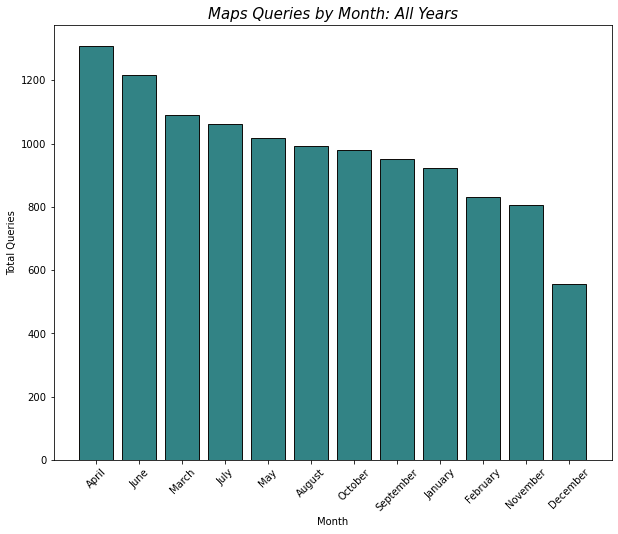

In [55]:
plt.subplots(figsize=(10, 8))
plt.bar(maps_df.month_name, maps_df.sum_query_count, color="#328385", edgecolor="#0f0e0c")
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.ylabel('Total Queries')
plt.title(label='Maps Queries by Month: All Years', fontsize=15, fontstyle='oblique')
plt.show()

##### This was my original "codes" query, the first part works but the second part didn't return the correct answer

In [20]:
codesendpoint='https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100&query_text=codes' #this returns all the queries
codesqueries=requests.get(codesendpoint)
codesqueries.text

'[{"month_name":"September","year":"2015","query_count":"101","query_text":"codes"}\n,{"month_name":"April","month":"4","year":"2021","query_count":"102","query_text":"codes"}\n,{"month_name":"August","year":"2016","query_count":"104","query_text":"codes"}\n,{"month_name":"November","month":"11","year":"2020","query_count":"104","query_text":"codes"}\n,{"month_name":"December","year":"2017","query_count":"106","query_text":"codes"}\n,{"month_name":"May","year":"2016","query_count":"107","query_text":"codes"}\n,{"month_name":"April","year":"2016","query_count":"111","query_text":"codes"}\n,{"month_name":"July","month":"7","year":"2021","query_count":"114","query_text":"codes"}\n,{"month_name":"January","year":"2017","query_count":"115","query_text":"codes"}\n,{"month_name":"May","month":"5","year":"2021","query_count":"115","query_text":"codes"}\n,{"month_name":"August","year":"2015","query_count":"117","query_text":"codes"}\n,{"month_name":"February","year":"2016","query_count":"121","

##### This didn't work because I only counted codes, not those over 100

In [21]:
codecountendpoint='https://data.nashville.gov/resource/fuaa-r5cm.json?$select=count(query_text="codes")'

In [22]:
countcodes=requests.get(codecountendpoint)
countcodes.text

'[{"count_query_text_codes":"43677"}]\n'